In [43]:
#Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv(r"D:\AISSMS IOIT - AI&DS (628299510)\General\Hackathons\Prasunethon\2. Feature_Extraction-Dataset.csv")
df.head()

,year_month,average_temperature_median,maximum_temperature_median,minimum_temperature_median,precipitation_lag_median,snow_depth_lag_median,wind_speed_lag_median,maximum_sustained_wind_speed_lag_median,wind_gust_lag_median,dew_point_lag_median,fog_lag_mean,thunder_lag_mean,lat_lag_median,lon_lag_median,is_fire
0,2013-01,55.614471,64.960743,44.885953,0.011162,999.900000,7.991097,13.838489,956.092650,41.105964,0,0,32.669667,-6.103159,1
1,2013-02,54.778911,66.249974,42.401767,1.201047,999.899998,7.141677,20.923666,920.017515,52.711859,0,0,32.641867,-6.160246,0
2,2013-03,59.054068,68.776137,48.846444,1.082615,999.900009,9.067693,16.035876,822.054271,46.756065,0,0,32.383879,-6.408526,0
3,2013-04,65.017165,75.533435,53.436463,0.502933,999.900011,7.435010,15.745283,892.987485,49.527429,1,0,32.524870,-6.464255,0
4,2013-05,65.352257,76.215955,53.523060,0.252309,999.900019,8.493570,17.927379,865.032257,59.992219,0,0,32.973982,-5.748396,0


## Extracting "year_month" and creating new features

In [20]:
df['year'] = pd.to_datetime(df['year_month']).dt.year
df['month'] = pd.to_datetime(df['year_month']).dt.month

In [21]:
df = df.drop(columns=['year_month'])

## Seperating Features and target

In [22]:
print(df.columns)

Index(['average_temperature_median', 'maximum_temperature_median',
       'minimum_temperature_median', 'precipitation_lag_median',
       'snow_depth_lag_median', 'wind_speed_lag_median',
       'maximum_sustained_wind_speed_lag_median', 'wind_gust_lag_median',
       'dew_point_lag_median', 'fog_lag_mean', 'thunder_lag_mean',
       'lat_lag_median', 'lon_lag_median', 'is_fire', 'year', 'month'],
      dtype='object')


In [23]:
X = df[['year', 'month', 'average_temperature_median', 'maximum_temperature_median', 'minimum_temperature_median',
        'precipitation_lag_median', 'snow_depth_lag_median', 'wind_speed_lag_median', 'maximum_sustained_wind_speed_lag_median',
        'wind_gust_lag_median', 'dew_point_lag_median', 'fog_lag_mean', 'thunder_lag_mean', 'lat_lag_median', 'lon_lag_median']]
y = df['is_fire']

## Training and Testing Set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Intializing and training the logistic regression model

In [25]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

## Predictions on test set

In [26]:
y_pred = model.predict(X_test_scaled)

In [34]:
print("\nPredictions:")
print(y_pred)


Predictions:
[1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0]


## Model Evaluation

In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 8  1]
 [ 2 13]]


<Axes: >

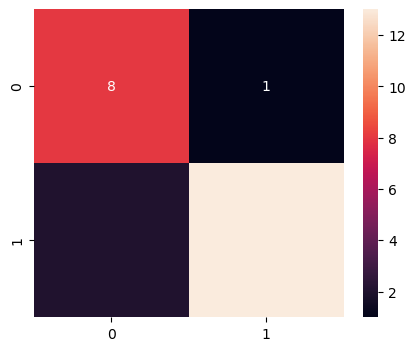

In [42]:
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, xticklabels = model.classes_, yticklabels = model.classes_)

In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.93      0.87      0.90        15

    accuracy                           0.88        24
   macro avg       0.86      0.88      0.87        24
weighted avg       0.88      0.88      0.88        24



In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.875


In [36]:
y_test_prob_positve = y_test_prob[: , 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_positve)
fpr

array([0., 1.])

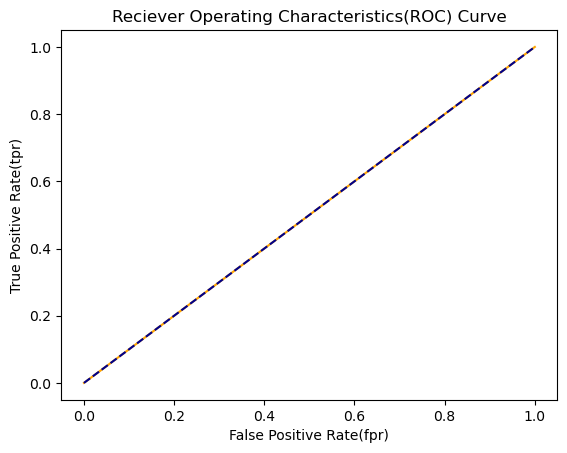

In [37]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color = "orange", label = "ROC")
    
    # Plot line with no predictive power(baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    plt.xlabel("False Positive Rate(fpr)")
    plt.ylabel("True Positive Rate(tpr)")
    plt.title("Reciever Operating Characteristics(ROC) Curve")
    
plot_roc_curve(fpr,tpr)

In [39]:
roc_auc_score(y_test, y_test_prob_positve)

0.5

In [44]:
print("Accuracy Score:", model.score(X_test, y_test))

Accuracy Score: 0.625


# Termination
Model has been built and evaluated.  
Next steps include model deployment